In [12]:
import pandas as pd

# NB Need to run AER_rapidfuzz,QJE_rapidfuzz,RES_rapidfuzz and JPE_rapidfuzz files before this file
# Retrieve the dataframe from the previous notebooks
%store -r AER_melted_master
%store -r QJE_melted_master
%store -r RES_melted_master
%store -r JPE_melted_master

# Retrieve from a local file storage
#AER_melted_master = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/AER/Test files/AER_melted_master_aff_count.xlsx')
#QJE_melted_master = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/QJE/Test files/QJE_melted_master_aff_count.xlsx')
#RES_melted_master = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/Test files/RES_melted_master_aff_count.xlsx')
#JPE_melted_master = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/JPE/Test files/JPE_melted_master_aff_count.xlsx')

In [13]:
print(AER_melted_master.shape)

(2350, 5)


In [14]:
print(AER_melted_master.shape ,QJE_melted_master.shape,RES_melted_master.shape,JPE_melted_master.shape)
melted_master = pd.concat([AER_melted_master,QJE_melted_master,RES_melted_master,JPE_melted_master ], axis=0)
melted_master_condenced = melted_master[['Article_ID','Aff number','Affiliation','year']]
print(melted_master_condenced.shape)
print(melted_master_condenced.head())

(2350, 5) (2249, 5) (2211, 5) (6993, 5)
(13803, 4)
    Article_ID Aff number                           Affiliation    year
653    1817012       aff1              Resources For The Future  1971.0
654    1817021       aff1  National Bureau Of Economic Research  1971.0
655    1817022       aff1  National Bureau Of Economic Research  1971.0
656    1817023       aff1  National Bureau Of Economic Research  1971.0
657    1817024       aff1  National Bureau Of Economic Research  1971.0


In [15]:
(melted_master_condenced.loc[(melted_master_condenced['Affiliation'] != 'National Bureau Of Economic Research')]).shape
melted_master_condenced = melted_master_condenced.loc[(melted_master_condenced['Affiliation'] != 'National Bureau Of Economic Research')]

In [16]:
melted_master_condenced = melted_master_condenced.sort_values(by=['year'])
melted_master_condenced['aff_cum_counts'] = melted_master_condenced.groupby(['Affiliation']).cumcount()+1

highest_vals = melted_master_condenced.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
6906,26549859,aff7,University Of Chicago,2016.0,696
6212,26549871,aff4,Harvard University,2016.0,605
4,26549916,aff1,Columbia University,2016.0,552
6634,26549861,aff5,Massachusetts Institute Of Technology,2016.0,486
22,26549881,aff1,Stanford University,2016.0,378
24,26549883,aff1,Princeton University,2016.0,329
6204,26549916,aff4,University Of Pennsylvania,2016.0,291
6819,26549893,aff6,Northwestern University,2016.0,268
0,26549911,aff1,Yale University,2016.0,254
37,26549862,aff1,"University Of California, Berkeley",2016.0,250


In [17]:
#melted_master_condenced.loc[(melted_master_condenced['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')

# Plotting a graph over time of the affilitions

     Article_ID Aff number              Affiliation    year  aff_cum_counts
3657    1825591       aff1   University Of Michigan  1940.0               1
3666    1824381       aff1  University Of Edinburgh  1940.0               1
6201    1824377       aff3                 C.O.R.E.  1940.0               1
6202    1824379       aff3           U.C. San Diego  1940.0               1
3664    1824379       aff1   University Of Arkansas  1940.0               1


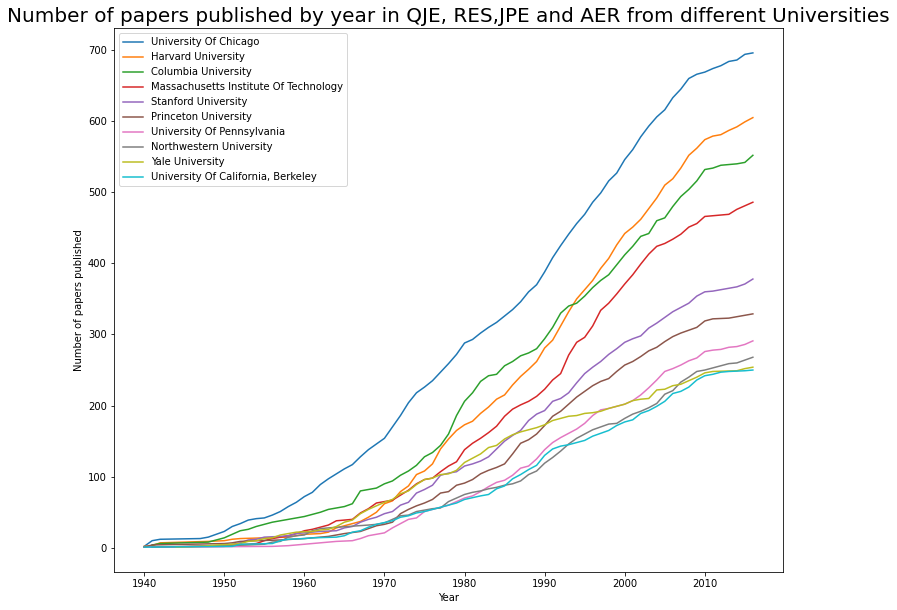

In [18]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = melted_master_condenced
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
#plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE, RES,JPE and AER from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()

# Ranking the Universities based on their number of papers per published per decade

In [19]:
melted_master_condenced = melted_master_condenced.sort_values(by=['year'])
melted_master_condenced['aff_cum_counts'] = melted_master_condenced.groupby(['Affiliation']).cumcount()+1

highest_vals = melted_master_condenced.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

Highest_10_df = melted_master_condenced.loc[melted_master_condenced['Affiliation'].isin([highest_vals_10.iat[0,2],highest_vals_10.iat[1,2], highest_vals_10.iat[2,2],highest_vals_10.iat[3,2],highest_vals_10.iat[4,2],highest_vals_10.iat[5,2],highest_vals_10.iat[6,2],highest_vals_10.iat[7,2],highest_vals_10.iat[8,2],highest_vals_10.iat[9,2]])]
Highest_10_df = Highest_10_df.sort_values(by=['year'])
print(Highest_10_df.shape)
print(Highest_10_df.tail())
Highest_10_df['aff_cum_counts_yearly'] = Highest_10_df.groupby(['Affiliation','year']).cumcount()+1
#Highest_10_df.drop_duplicates(subset = ['Affilitation'], keep = 'last', inplace= True)
print(Highest_10_df.shape)
print(Highest_10_df.tail())

(4109, 5)
     Article_ID Aff number                            Affiliation    year  \
6634   26549861       aff5  Massachusetts Institute Of Technology  2016.0   
6625   26549906       aff5                    Columbia University  2016.0   
22     26549881       aff1                    Stanford University  2016.0   
6205   26549900       aff4                    Columbia University  2016.0   
0      26549911       aff1                        Yale University  2016.0   

      aff_cum_counts  
6634             483  
6625             546  
22               374  
6205             547  
0                254  
(4109, 6)
     Article_ID Aff number                            Affiliation    year  \
6634   26549861       aff5  Massachusetts Institute Of Technology  2016.0   
6625   26549906       aff5                    Columbia University  2016.0   
22     26549881       aff1                    Stanford University  2016.0   
6205   26549900       aff4                    Columbia University  2016

In [20]:
melted_master_condenced = melted_master_condenced.sort_values(by=['year'])
melted_master_condenced['aff_cum_counts'] = melted_master_condenced.groupby(['Affiliation']).cumcount()+1

highest_vals = melted_master_condenced.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

a = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[0,2]]
a['aff_cum_counts_yearly'] = a.groupby(['year']).cumcount()+1
a = a.drop_duplicates(subset = ['year'], keep = 'last')
print(a.head())
print(a.shape)


     Article_ID Aff number            Affiliation    year  aff_cum_counts  \
3661    1825598       aff1  University Of Chicago  1940.0               2   
3621    1825329       aff1  University Of Chicago  1941.0              10   
3611    1825432       aff1  University Of Chicago  1942.0              12   
3553    1826223       aff1  University Of Chicago  1947.0              13   
3539    1826046       aff1  University Of Chicago  1948.0              15   

      aff_cum_counts_yearly  
3661                      2  
3621                      8  
3611                      2  
3553                      1  
3539                      2  
(72, 6)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_77793/2020417594.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['aff_cum_counts_yearly'] = a.groupby(['year']).cumcount()+1


In [21]:
yearly_index = []
for i in range(1940,2011):
    yearly_index.append(i)

#print(list)
a = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[0,2]]
a['aff_cum_counts_yearly'] = a.groupby(['year']).cumcount()+1
a = a.drop_duplicates(subset = ['year'], keep = 'last')
print(a.shape)
#print(a)
a.set_index('year', inplace= True)
a = a.reindex(yearly_index, fill_value=0)
a['Affiliation'] = highest_vals_10.iat[0,2]
print(a.shape)

b = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[1,2]]
b['aff_cum_counts_yearly'] = b.groupby(['year']).cumcount()+1
b = b.drop_duplicates(subset = ['year'], keep = 'last')
print(b.shape)
#print(b)
b.set_index('year', inplace= True)
b = b.reindex(yearly_index, fill_value=0)
b['Affiliation'] = highest_vals_10.iat[1,2]
print(b.shape)

c = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[2,2]]
c['aff_cum_counts_yearly'] = c.groupby(['year']).cumcount()+1
c = c.drop_duplicates(subset = ['year'], keep = 'last')
print(c.shape)
#print(c)
c.set_index('year', inplace= True)
c = c.reindex(yearly_index, fill_value=0)
c['Affiliation'] = highest_vals_10.iat[2,2]
print(c.shape)

d = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[3,2]]
d['aff_cum_counts_yearly'] = d.groupby(['year']).cumcount()+1
d = d.drop_duplicates(subset = ['year'], keep = 'last')
print(d.shape)
#print(c)
d.set_index('year', inplace= True)
d = d.reindex(yearly_index, fill_value=0)
d['Affiliation'] = highest_vals_10.iat[3,2]
print(d.shape)

e = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[4,2]]
e['aff_cum_counts_yearly'] = e.groupby(['year']).cumcount()+1
e = e.drop_duplicates(subset = ['year'], keep = 'last')
print(e.shape)
#print(c)
e.set_index('year', inplace= True)
e = e.reindex(yearly_index, fill_value=0)
e['Affiliation'] = highest_vals_10.iat[4,2]
print(e.shape)

#6
f = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[5,2]]
f['aff_cum_counts_yearly'] = f.groupby(['year']).cumcount()+1
f = f.drop_duplicates(subset = ['year'], keep = 'last')
print(f.shape)
#print(c)
f.set_index('year', inplace= True)
f = f.reindex(yearly_index, fill_value=0)
f['Affiliation'] = highest_vals_10.iat[5,2]
print(f.shape)

#7
g = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[6,2]]
g['aff_cum_counts_yearly'] = g.groupby(['year']).cumcount()+1
g = g.drop_duplicates(subset = ['year'], keep = 'last')
print(g.shape)
#print(c)
g.set_index('year', inplace= True)
g = g.reindex(yearly_index, fill_value=0)
g['Affiliation'] = highest_vals_10.iat[6,2]
print(g.shape)

#8
h = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[7,2]]
h['aff_cum_counts_yearly'] = h.groupby(['year']).cumcount()+1
h = h.drop_duplicates(subset = ['year'], keep = 'last')
print(h.shape)
h.set_index('year', inplace= True)
h = h.reindex(yearly_index, fill_value=0)
h['Affiliation'] = highest_vals_10.iat[7,2]
print(h.shape)

#9
i = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[8,2]]
i['aff_cum_counts_yearly'] = i.groupby(['year']).cumcount()+1
i = i.drop_duplicates(subset = ['year'], keep = 'last')
print(i.shape)
i.set_index('year', inplace= True)
i = i.reindex(yearly_index, fill_value=0)
i['Affiliation'] = highest_vals_10.iat[8,2]
print(i.shape)

#10
j = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[9,2]]
j['aff_cum_counts_yearly'] = j.groupby(['year']).cumcount()+1
j = j.drop_duplicates(subset = ['year'], keep = 'last')
print(j.shape)
j.set_index('year', inplace= True)
j = j.reindex(yearly_index, fill_value=0)
j['Affiliation'] = highest_vals_10.iat[9,2]
print(j.shape)

(72, 6)
(71, 5)
(64, 6)
(71, 5)
(66, 6)
(71, 5)
(67, 6)
(71, 5)
(65, 6)
(71, 5)
(61, 6)
(71, 5)
(57, 6)
(71, 5)
(61, 6)
(71, 5)
(67, 6)
(71, 5)
(58, 6)
(71, 5)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_77793/850510816.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['aff_cum_counts_yearly'] = a.groupby(['year']).cumcount()+1
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_77793/850510816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['aff_cum_counts_yearly'] = b.groupby(['year']).cumcount()+1
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_77793/850510816.py:27: SettingWithCopyWarning: 
A value is trying to be se

In [22]:
ranked = pd.concat([a,b,c,d,e,f,g,h,i,j], axis=0)
ranked = ranked.sort_values(by=['year','Affiliation'])
print(ranked.shape)

ranked['Rank'] = ranked.groupby(['year'])['aff_cum_counts_yearly'].rank(method = 'max', ascending= False)
print(ranked.shape)
print(ranked.tail(20))
#ranked.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/Combined journals/Combined journal yearly rank.xlsx') 

(710, 5)
(710, 6)
     Article_ID Aff number                            Affiliation  \
year                                                                
2009   40506270       aff2                    Columbia University   
2009   40506272       aff2                     Harvard University   
2009   40506244       aff1  Massachusetts Institute Of Technology   
2009   40506271       aff2                Northwestern University   
2009   40247633       aff1                   Princeton University   
2009   40506224       aff1                    Stanford University   
2009     644840       aff1     University Of California, Berkeley   
2009   25592402       aff1                  University Of Chicago   
2009   40506236       aff2             University Of Pennsylvania   
2009   40506225       aff1                        Yale University   
2010   40587646       aff1                    Columbia University   
2010   40961010       aff1                     Harvard University   
2010   40961013 

In [23]:
ranked = pd.concat([a,b,c,d,e,f,g,h,i,j], axis=0)
ranked = ranked.sort_values(by=['year','Affiliation']).reset_index()
ranked = ranked[['year','Affiliation','aff_cum_counts_yearly']]
###print(ranked.shape)
#print(ranked.tail())
ranked['year'] = pd.to_datetime(ranked['year'],format = '%Y')
#ranked.set_index('year', inplace= True)
#print(ranked.shape)

new_rank = ranked.groupby(['Affiliation',pd.Grouper(key = 'year', freq = '10Y')]).sum().reset_index()
#print(new_rank.dtypes)
new_rank['year'] = new_rank['year'].dt.year

new_rank['Rank'] = new_rank.groupby(['year'])['aff_cum_counts_yearly'].rank(method = 'max', ascending= False)
new_rank = new_rank.sort_values(by=['year','Affiliation'])
print(new_rank.shape)
print(new_rank.tail(20))
#new_rank.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/Combined journals/Combined journal 10 year rank.xlsx') 

(80, 4)
                              Affiliation  year  aff_cum_counts_yearly  Rank
6                     Columbia University  2000                    118   4.0
14                     Harvard University  2000                    161   1.0
22  Massachusetts Institute Of Technology  2000                    148   3.0
30                Northwestern University  2000                     63   8.0
38                   Princeton University  2000                     85   6.0
46                    Stanford University  2000                     96   5.0
54     University Of California, Berkeley  2000                     47   9.0
62                  University Of Chicago  2000                    158   2.0
70             University Of Pennsylvania  2000                     64   7.0
78                        Yale University  2000                     29  10.0
7                     Columbia University  2010                    120   3.0
15                     Harvard University  2010                    1

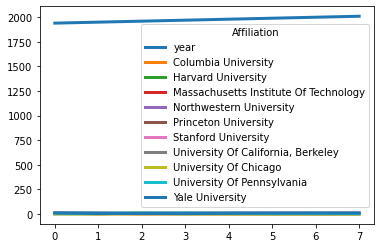

In [24]:
table = pd.pivot_table(new_rank, values = 'Rank',index = 'year', columns = 'Affiliation').reset_index()
chart = table.plot( kind='line', linewidth=3.0)


In [25]:
table.index

RangeIndex(start=0, stop=8, step=1)

In [26]:
pd.pivot_table(new_rank, values = 'Rank',index = 'Affiliation', columns = 'year')

year,1940,1950,1960,1970,1980,1990,2000,2010
Affiliation,,,,,,,,
Columbia University,10.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0
Harvard University,2.0,3.0,8.0,3.0,3.0,1.0,1.0,1.0
Massachusetts Institute Of Technology,10.0,7.0,3.0,5.0,4.0,4.0,3.0,4.0
Northwestern University,10.0,7.0,6.0,9.0,9.0,10.0,8.0,7.0
Princeton University,5.0,4.0,9.0,8.0,6.0,5.0,6.0,9.0
Stanford University,5.0,9.0,5.0,6.0,5.0,6.0,5.0,6.0
"University Of California, Berkeley",5.0,10.0,7.0,8.0,10.0,8.0,9.0,8.0
University Of Chicago,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
University Of Pennsylvania,10.0,9.0,10.0,10.0,8.0,7.0,7.0,5.0


In [27]:
pd.pivot_table(new_rank, values = 'Rank',index = 'year', columns = 'Affiliation').reset_index()

Affiliation,year,Columbia University,Harvard University,Massachusetts Institute Of Technology,Northwestern University,Princeton University,Stanford University,"University Of California, Berkeley",University Of Chicago,University Of Pennsylvania,Yale University
0,1940,10.0,2.0,10.0,10.0,5.0,5.0,5.0,2.0,10.0,10.0
1,1950,2.0,3.0,7.0,7.0,4.0,9.0,10.0,1.0,9.0,5.0
2,1960,2.0,8.0,3.0,6.0,9.0,5.0,7.0,1.0,10.0,5.0
3,1970,2.0,3.0,5.0,9.0,8.0,6.0,8.0,1.0,10.0,4.0
4,1980,2.0,3.0,4.0,9.0,6.0,5.0,10.0,1.0,8.0,7.0
5,1990,3.0,1.0,4.0,10.0,5.0,6.0,8.0,2.0,7.0,9.0
6,2000,4.0,1.0,3.0,8.0,6.0,5.0,9.0,2.0,7.0,10.0
7,2010,3.0,1.0,4.0,7.0,9.0,6.0,8.0,2.0,5.0,10.0
